2025/12/31 by Jiahao.Li

As we know, realizing a classical computation requires the corperation of thousands of basic logic gate, such as 'AND', 'OR', 'NOT', 'FANOUT' and so on. Sometimes we need quantum circuit to simulate the classical circuit. For example, in Shor's algorithm, the 'AND' operation is frequently applied. Therefore, it is necessry to figure out how to simulate these gates and evaluate their computational cost.   

# 1.Simulating boolean circuits with quantum circuits
For 'AND', 'OR' and 'FANOUT', we always need an ancilla qubit. Depending on the number of inputs, the system will require a additional qubit to maintain reversibility.  

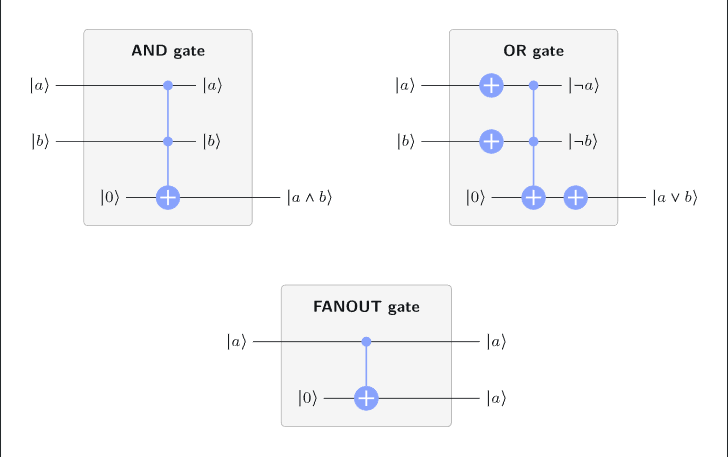

A key component is the Toffoli gates, which is not an atomic gate in mostly physical implementations(as it can't be executed in one clk cyrcle). Toffoli gates can alternatively be described as controlled-controlled-NOT gate:

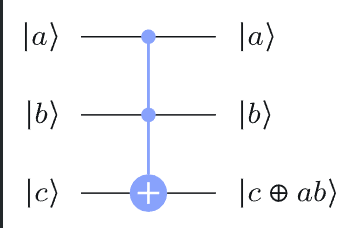

But in physic layer, it is possible to contruct a Toffoli gate from $H,T,T^{\dagger}$ and CNOT as follows.

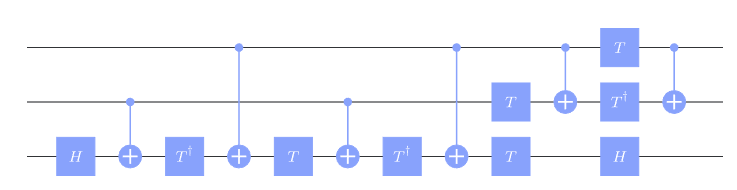

# 2.Cost evaluation:Circuit size and depth
While qubit count can be optimised by efficient encoding, the primary computational cost typically stems from the circuit size and depth.

## 2.1 Elementary operations
We define a universal gate set as our basis for cost evaluation:
  * Single-qubit unitary gates: $X,Y,Z,H,S,S^{\dagger}$ . 
  * Non-Clifford gate: $T$ and $T^{\dagger}$.
  * CNOT gate.
  * Single-qubit standard basis measurement.
  * Identify(I),Reset.

## 2.2 Circuit Cost
We evaluate the circuit size and depth basing on these default gates. The total number of gates in a circuit is refered to as that circuit's size. 
It is worth noting that the size of the Toffoli gate we demostrated above, can not be simply evaluated by a gate count of 15. Because the T-gate costs more that other default gates.
The size decides the actually physical circuit's scale, and the depth decides how much the time a given circuit costs.
In quantum computing, depth is critical metric because quantum information is fragile, a circuit must complete execution within the qubits' coherence time. Therefore, maximizing parallelism to reduce depth is always important than minimizing the size.

Note that, reducing depth is more constrained than in classical computing. Due to physical hardware limitation, a qubit can't be transmitted to an arbitray location. This constraint, known as 'Connectivity', often necessitates additional operations (such as SWAP gates) to move qubits, which can inadvertently increase both circuit size and depth.

While the asymptotic cost (as a function of input length $n$) provides a theoretical upper bound, the actual performance of a quantum algorithm is determined by its gate-level implementation. In the following sections, we will focus on the gate-by-gate simulation of Boolean circuits and the essential technique of uncomputation (garbage collection).

# 3. Gate by gate simulation of Boolean circuits
In classical computation, operations such as AND (a^b=c) are inherently non-reversible because the input information (a,b) is lost during the process. To simulate these in a quantum system, we must introduce ancilla qubits to satisfy the requirement of reversibility. This principle must be strictly followed when constructing any quantum circuit from classical logic.

Supposed we have a circuit named 'C', composed of AND, OR, NOT and FANOUT gates, and having n input bits and m output bits. Let t = Size(C) be the number of gates in C. We define 'f' to denote a function discribing the circuit C, and get the form:
$$f:\Sigma^n \to \Sigma^m$$
For $\Sigma $= {0,1}.

As the follows figure shows, trying to simulate a complex classical gates circuit, we need to replace classical gate by quantem AND, OR, FANOUT gates and naturally introduce some auxiliary qubits.

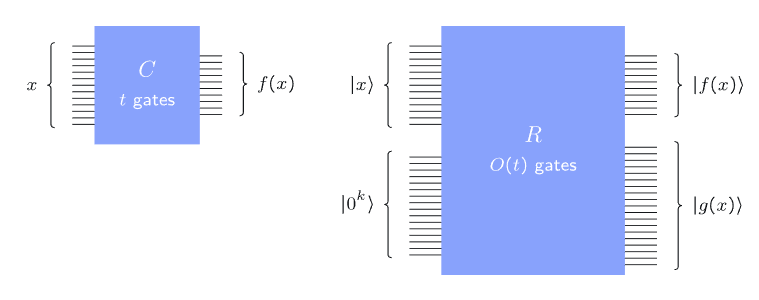 

Now, let focus on the R circuit block. Circuit produce the output f(x) and leftover g(x). In fact we always use SWAP gates to aggregate all the leftover states to the buttom. And SWAP gate can be implemented with three CNOT gates as follows:

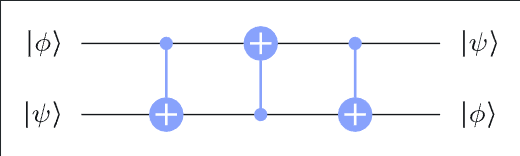

Besides, the g(x)'s 'g' refers to the word 'garbage', means we need to recycle it to prevent decoherence in the quantum system.

# 4.Cleaning up the garbage
Interference is the cornerstone of quantum speedup, yet "garbage" qubits can inadvertently entangle with the primary register, destroying the interference patterns essential for quantum algorithms. Fortunately, it's not difficult to clean up the garbage. 
Because of the reversibility of unitary operation R, we can use $R^{\dagger}$ and CNOT to construct a garbaage recycle circuit as follows,

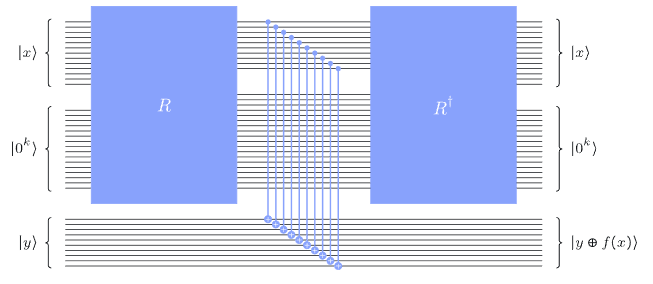

In this architecture, the result $f(x)$ is first computed and then "copied" to the output register $|y\rangle$ via CNOT gates. Subsequently, by applying the adjoint operation $R^{\dagger}$, the workspace qubits are disentangled and returned to their initial states $|0^k\rangle$. This process ensures that the garbage states $|g(x)\rangle$ are eliminated, leaving the ancilla qubits available for reuse and preserving the coherence of the system.

